In [ ]:
from decimal import *
import numpy as np
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
import math

In [ ]:
def d(x):
  return Decimal(x)

# Задание 1

---

Напишите функцию linan(), которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan():
  a11, a12, b1 = map(float, input().split())
  a21, a22, b2 = map(float, input().split())

  answer = np.linalg.solve(np.array([[a11, a12], [a21, a22]]), np.array([b1, b2]))
  x, y = answer[0], answer[1]

  return f"{round(x, 2)} {round(y, 2)}"

linan()

1 2 3
3 2 1


'-1.0 2.0'

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый результат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



Обратите внимание, что ожидается массив numpy

In [ ]:
def decorate_matrix(n):
  matrix = np.zeros((n, n))
  matrix[0,:] = 1
  matrix[-1,:] = 1
  matrix[:,0] = 1
  matrix[:,-1] = 1

  return matrix
decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy.optimize import fmin
import sys;

def f(x, a, b):
  return (x + a) ** 2 - b

def g(x, a, b):
  return abs(f(x, a, b))

def find_argmin(func, a, b):
  '''
  def func_left(x):
    if (x <= -a):
        return func(x, a, b)
    else:
      return +100500
  def func_right(x):
    if (x >= -a):
        return func(x, a, b)
    else:
      return +100500


  result1 = minimize_scalar(lambda x: func_left(x))
  result2 = minimize_scalar(lambda x: func_right(x))
  if (result1.x == result2.x):
    return (round(result1.x, 2))
  else:
    return (round(result1.x, 2), round(result2.x, 2)) '''
  result = np.array(round(minimize_scalar(lambda x: func(x, a, b)).x, 2))
  if (result != -a):
    if (result < -a):
        result = np.append(result, -a + abs(-a - result))
    else:
        result = np.append(result, -a - abs(-a - result))

  return np.array(result)

a, b = map(float, input().split())
argmin_f = find_argmin(f, a, b)
argmin_g = find_argmin(g, a, b)
print(f'{argmin_f} {argmin_g}')

3 4
-3.0 [-1. -5.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

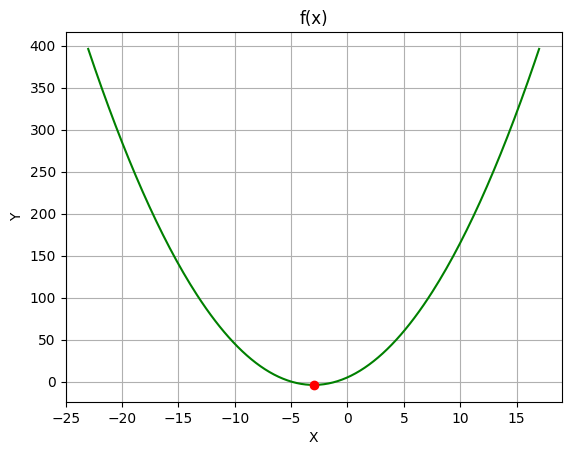

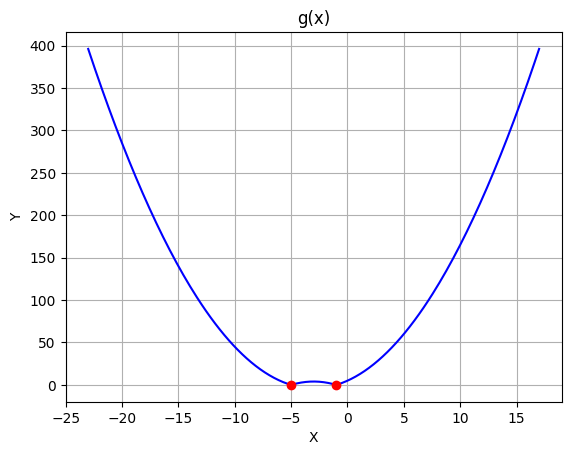

In [ ]:
def plot_function(f, a, b, argmin, col, title):
    x = np.linspace(-a - 20, -a + 20, 200)
    y = f(x, a, b)

    plt.plot(x, y, color=col)
    plt.ylabel("Y")
    plt.xlabel("X")

    if (type(argmin) is np.array):
      for x in argmin:
        plt.plot(x, f(x, a, b), 'o', color='red', label='argmin')
    else:
      plt.plot(argmin, f(argmin, a, b), 'o', color='red', label='argmin')

    plt.grid()
    plt.title(title)
    plt.show()

plot_function(f, a, b, argmin_f, 'green', "f(x)")

plot_function(g, a, b, argmin_g, 'blue', "g(x)")

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
from math import comb

n = d(10) # количество бросков одним человеком
p = d(0.5) # вероятность выпадения орла или решки

k = d(10) # количество выпадения монетки подряд одной и той же стороной

c = d(1000) # число человек

# вероятность того, что монетка выпадет 10 раз одной и той же стороной у одного человека
p_one_person = p ** k * 2
# вероятность того, что ни у одного монетка HE выпала 10 раз подряд той же самой стороной
p_no_one = (1 - p_one_person) ** c

# вероятность того, что хотя бы у одного человека монетка выпадет 10 раз подряд
p_at_least_one_person = 1 - p_no_one

print("1.", round(p_at_least_one_person, 2))





k = d(8)
# вероятность того, что монетка выпадет 8 раз подряд у одного человека
p_one_person = p ** k * (1 - p** (n - k)) ** (n - k) * 2
# вероятность того, что ни у одного монетка HE выпала 10 раз подряд той же самой стороной
p_no_one = (1 - p_one_person) ** c
# вероятность того, что хотя бы у одного человека монетка выпадет 8 раз подряд
p_at_least_one_person = 1 - p_no_one

print("2.", round(p_at_least_one_person, 2))




# Число сочетаний из c по k
def C (c, k):
    return d(math.factorial(int(c)) / (math.factorial(int(c - k)) * math.factorial(int(k))))

# Формула Бернулли: вероятность того, что событие (с вероятностью p) наступит ровно k раз из c
def Bernoulli(p, c, k):
    return d(C(c, k)) * (p ** 9) ** k * (d(511 / 512)) ** (c - k)
k = d(10) # количество выпадения монетки подряд одной и той же стороной

# вероятность того, что монетка выпадет 10 раз одной и той же стороной у одного человека
p_one_person = p ** k * 2

# вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной
p_exactly_3_people = Bernoulli(p, c, 3)
print("3.", round(p_exactly_3_people, 2))

1. 0.86
2. 0.99
3. 0.18
